In [3]:
# find Stopwords for Hinglish- remove min_df,max_df
# Try compressing the songs first and then pass to word2vec
# Trends in songs over the years
# Find the topics on which songs are focused
# 
!pip install wordcloud

  Using cached wordcloud-1.7.0.tar.gz (216 kB)
  Using cached Pillow-7.2.0-cp38-cp38-win_amd64.whl (2.1 MB)
  Using cached matplotlib-3.3.0-cp38-cp38-win_amd64.whl (8.8 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp38-none-win_amd64.whl (58 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
Using legacy setup.py install for wordcloud, since package 'wheel' is not installed.


ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'c:\\python38\\Lib\\site-packages\\__pycache__\\pyparsing.cpython-38.pyc'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [11]:
import pandas as pd
import numpy as np
import nltk
# import gensim
# from gensim.models.phrases import Phrases, Phraser
# from gensim.models import word2vec
import re
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import operator
from collections import defaultdict

In [12]:
data=pd.read_csv("songs7kFormated.csv")
data.head()

,Unnamed: 0,songLyrics,songMovie,songSinger,songName,years
0,0,Ghoomar rabb waare\r\nAap padharo saa\r\n\r\nA...,Padmaavat,Shreya Ghoshal,Ghoomar,2018
1,1,Yo yo honey singh…\r\n\r\nHoye…\r\n\r\nSuno ka...,Sonu Ke Titu ki Sweety,"Yo Yo Honey Singh, Simar Kaur & Ishers",Dil Chori,2018
2,2,Aaj se teri saari galiyan meri ho gayi\r\nAaj ...,Padman,Arijit Singh,Aaj Se Teri,2018
3,3,Boy you don’t have to be the last one standing...,Sonu Ke Titu Ki Sweety,Zack Knight & Jasmin Walia,Bom Diggy Diggy,2018
4,4,Pila de.. pila de..\r\nPila de pila de\r\n\r\n...,Sonu Ke Titu ki Sweety,"Yo Yo Honey Singh, Neha Kakkar, Navraj Hans",Chhote Chhote Peg Maar,2018


In [16]:
data = data.sort_values(by=['years'], ascending= False)

In [17]:
data.head(2)

,Unnamed: 0,songLyrics,songMovie,songSinger,songName,years
0,0,Ghoomar rabb waare\r\nAap padharo saa\r\n\r\nA...,Padmaavat,Shreya Ghoshal,Ghoomar,2018
127,127,Nain phisal gaye\r\nNazrein phisal gayi\r\nBut...,Welcome to New York,Payal Dev,Nain Phisal Gaye,2018


In [34]:
# data['songLyrics'][0].split("\n")

# nltk.download('punkt')
doc=[]
for i in range(data.shape[0]):
    try:
        doc.append(nltk.word_tokenize(re.sub('[^a-zA-z\s]','',data['songLyrics'][i].lower())))
    except:
        doc.append(nltk.word_tokenize(re.sub('[^a-zA-z\s]','',data['songLyrics'][i-1].lower())))

    

In [46]:
np.isnan(data['songLyrics'][2749])



In [36]:
# import nltk
# nltk.download('punkt')

In [37]:
count_words = {}
for x in doc:
    for y in x:
        if count_words.get(y)==None:
            count_words[y] = 0
        count_words[y]+=1


In [38]:
sorted_weight = sorted(count_words.items(), key=lambda x:x[1], reverse = True
       )
stopWords = sorted_weight[:300]

def column(matrix, index):
    x = []
    for y in matrix:
        x.append(y[index])
    return x
stopWords = column(stopWords,0)
stopWords[:10]

['hai', 'ke', 'na', 'dil', 'ho', 'me', 'ki', 'se', 'tu', 'ye']

#### Doc with removed stop words
> format of doc : 

In [40]:
# nltk.download('punkt')
doc=[]
for i in range(data.shape[0]):
    try:
        doc.append(set([x for x in nltk.word_tokenize(re.sub('[^a-zA-z\s]','',data['songLyrics'][i].lower())) if x not in stopWords]))
    except:
        doc.append(set([x for x in nltk.word_tokenize(re.sub('[^a-zA-z\s]','',data['songLyrics'][i-1].lower())) if x not in stopWords]))

        

# Bag of words approach

In [41]:
strr=""
for i in doc[:1000]:
    for j in i:
        strr=strr+' '+ j

In [ ]:
# wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(strr)
# plt.figure(figsize=(12,10))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

> Word cloud for songs after 2010

In [ ]:
# strr=""
# for i in doc[3300:4480]:
#     for j in i:
#         strr=strr+' '+ j

In [ ]:
len(strr)

In [ ]:
# wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(strr)
# plt.figure(figsize=(12,10))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

> Word Cloud of Songs before 2000

### Finding the word rank over the years

> To do: Remove stop words ( atleast 100) and then find ranks

> Do on a set of (list of words ) instead of taking all the repetitions

In [42]:
# for every year, create a list of dictionary
# every dictionary has word and frequency count
# create a global list of words and frequency count as well

data

,Unnamed: 0,songLyrics,songMovie,songSinger,songName,years
0,0,Ghoomar rabb waare\r\nAap padharo saa\r\n\r\nA...,Padmaavat,Shreya Ghoshal,Ghoomar,2018
127,127,Nain phisal gaye\r\nNazrein phisal gayi\r\nBut...,Welcome to New York,Payal Dev,Nain Phisal Gaye,2018
118,118,12 ki umar mein tum pehli baar dikhi\r\n13 ka ...,Baa Baaa Black Sheep,Sonu Nigam,Angelina,2018
119,119,Kala na safed hai\r\nKala na safed hai\r\nIshq...,Manmarziyaan,"Harshdeep Kaur, Jazim Sharma",Grey Walaa Shade,2018
120,120,Hey…\r\nSajni raahein mangal gaavein\r\nMann u...,Parmanu The Story of Pokhran,Jyotica Tangri,Shubh Din,2018
...,...,...,...,...,...,...
7328,7328,chadti jawani me jhulo jholo meri rani\r\ntum ...,Shehnai,"Geeta Dutt, Chitalkar Ramchandra, Binapani Muk...",Chadhti Jawani Me Jhulo,1947
7329,7329,"ye kaun chalaa, ye kaun chala, ye kaun chala h...",Dard,Uma Devi,Ye Kaun Chala,1947
7330,7330,Haa\r\nAayi ajal aye zindagi\r\nGham ka zamana...,Elan,Amirbai Karnataki,Aayi Ajal Aye Zindagi,1947
7331,7331,mere piya to base pardes re\r\nhaye basant rut...,Do Bhai,Geeta Dutt,Mere Piya To Base Pardes Re,1947


In [49]:
# set(data.years)

In [57]:
dummySong = data['songLyrics'][1]
# dummySong = set([x for x in nltk.word_tokenize(re.sub('[^a-zA-z\s]','',data['songLyrics'][2-1].lower())) if x not in stopWords])
# dummySong

In [60]:
# get all the songs for a year
# return type list ( song1, song2 , ...., songN)
def getSongsForYear(dataframe, columnNameWithYear = "years", year = "2019", songLyricsColumn = "songLyrics"):
    return list(dataframe[data[columnNameWithYear] == year]["songLyrics"])

# preprocesses a single song and returns a song as output
def songPreprocessing(song):
    try:
        listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    except:
        listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',dummySong) # For nan values, normalize
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        if word == '':
            continue
        processedSong+=word+' '
    return processedSong
def processDataFrame(data):
    allSongs=[]
    for year in data.years.unique():
        
        songs = getSongsForYear(data, "years", year, "songLyrics")
        for mySong in songs:
            # preprocess the songs
            mySong = songPreprocessing(mySong)
            allSongs.append(mySong)
    return allSongs
        

In [61]:
# create an english dictionary 
englishWords = {}
df = pd.read_excel("wordlist60k.xlsx") # once we have the data
listOfWords = list(df.a)
for word in listOfWords:
    englishWords[word] = True
# now get the words in the dataset
allSongs = processDataFrame(data)
englishWordsData = {}
for song in allSongs:
    l = song.split(" ")
    for word in  l:
        if englishWords.get(word) != None:
            englishWordsData[word] = True
        
        

In [62]:
len(englishWordsData)

4445

In [63]:
import operator
# assigns ranks for a year to the words
# input dictionary for a year { word: frequency}
# output  dictionary {word: rank} 
def assignRankToWords(d):
    sortedListOfWords = sorted(d.items(), key = operator.itemgetter(1), reverse = True)
    rankDictionary = {}
    currentRank = 0
    
    # [('hai', 1664),
    #      ('tu', 848),
    #      ('main', 817)] sample sorted list of words
    # since words are reverse sorted so :
    for pair in sortedListOfWords:
        word = pair[0]
        rank = currentRank
        rankDictionary[word] = rank
        currentRank+=1
    return rankDictionary

        

# generate year wise word frequency count in all songs
# input  = data ( songs data)
# output = List of 2 dictionaries [dictionary ( { year : {word: frequency}}  ), globalRankDictionary (year , {word: rank}) ]
def createWordFreqCountPerYear(data):
    listOfDictionary = []
    gDict = {}
    gRankDictionary = {}
    for year in data.years.unique():
        songs = getSongsForYear(data, "years", year, "songLyrics")
        d = {}
        for mySong in songs:
            # preprocess the songs
            mySong = songPreprocessing(mySong)
            listOfWords = mySong.split(" ")
            for word in (listOfWords): # use set here as well
                if d.get(word) == None: 
                    d[word] = 0
                d[word]+=1
        # assign rank to words
        rankDictionary = assignRankToWords(d)
        gRankDictionary[year] = rankDictionary
        gDict[year] = d
            

    return [gDict, gRankDictionary]
#     listOfDictionary.append(gDict)
    

gDict, gRankDictionary = createWordFreqCountPerYear(data) # global dictionary



In [65]:
sorted(gDict[2018].items(), key = operator.itemgetter(1), reverse = True)[:10]

[('hai', 1268),
 ('tu', 588),
 ('main', 551),
 ('ho', 526),
 ('na', 497),
 ('mein', 475),
 ('ke', 471),
 ('se', 455),
 ('ki', 422),
 ('tere', 354)]

In [69]:
import operator
wordFreqDict = gDict[2018]
sorted( wordFreqDict.items(), key=operator.itemgetter(1), reverse = True)[:10]

[('hai', 1268),
 ('tu', 588),
 ('main', 551),
 ('ho', 526),
 ('na', 497),
 ('mein', 475),
 ('ke', 471),
 ('se', 455),
 ('ki', 422),
 ('tere', 354)]

In [70]:
# Word rank for a year
# input  dictionary ( { year : {word: rank}}  ) , word
# output is word rank of a word in several years [ list (year, rank)]
def getWordRanks(gRankDictionary = gRankDictionary, word = "ladki"):
    retList = []
    for year in gRankDictionary.keys():
        if year == 0 :
            continue
        d = gRankDictionary[year]
        if(d.get(word) == None):
            retList.append([year, 1])
        else:
            retList.append([year, d[word]/len(d)])
    
    return retList

# let's merge some of these years and take a moving average

# Use: averages 2d matrix (year: values) to 2d matrix (year/4, average(values) over 4 years)
# input, 2d matrix , years to average on (even numbers 0, 2 , 4 ...)
# output is 2d matrix
def average2DMatrixOverTime(myList, yearNumberToAverage ):
    yearCounter = 0
    averagedList = []
    myYear = 0
    numberYearAverage = yearNumberToAverage
    movingAverage = 0
    for x in myList:
    #     print(x)
        year = x[0]
        rank = x[1]
        movingAverage+=rank
        if(yearCounter == int(numberYearAverage/2)):
            myYear = year


        if yearCounter == numberYearAverage:
            averagedList.append([myYear, movingAverage/numberYearAverage])
            yearCounter = 0
            movingAverage = 0

        yearCounter+=1
    return averagedList

# gets column in a n-Dimensional matrix
def column(matrix, index):
    x = []
    for y in matrix:
        x.append(y[index])
            
    return x

word1 = "paisa"
word2 = "ladki"
myList = getWordRanks(gRankDictionary, word1)
myList2 = getWordRanks(gRankDictionary, word2)
myList = sorted(myList,key= operator.itemgetter(0), reverse = False)
myList2 = sorted(myList2,key= operator.itemgetter(0), reverse = False)

In [71]:
averagedList = average2DMatrixOverTime(myList, 4)
averagedList2 = average2DMatrixOverTime(myList2, 4)
# averagedList = sorted(averagedList,key= operator.itemgetter(0), reverse = True)
# averagedList2 = sorted(averagedList2,key= operator.itemgetter(0), reverse = True)
len(column(averagedList,0))

17

Do singlePlot = True to plot or plt.show() to Print
Do singlePlot = True to plot or plt.show() to Print


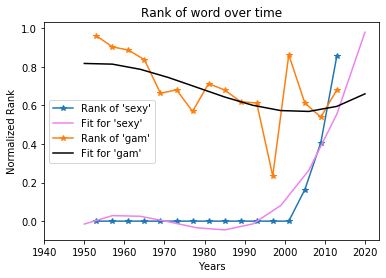

In [111]:
# Input a word and get yearwise rank of the word

#input the word and chart is  ploted automatically 
def plotRankChart(word, gRankDictionary, fitPolynomialDegree = -1, fitPolynomial_X_list = np.array(range(0,1,4)), singlePlot = False, polyFitColor = '' ):
    myList = getWordRanks(gRankDictionary, word)
    myList = sorted(myList,key= operator.itemgetter(0), reverse = False)
    averagedList = average2DMatrixOverTime(myList, 4)
#     sns.lineplot(column(averagedList, 0), column(averagedList, 1),  marker = '*', dashes = False, label = "Rank of \'"+word+"\'")
    
#     plt.plot(column(averagedList, 0)[1:], column(averagedList, 1)[1:],  marker = '*',  label = "Rank of \'"+word+"\'")
    plt.plot(column(averagedList, 0)[1:], ([1-x for x in column(averagedList, 1)[1:]]),  marker = '*',  label = "Rank of \'"+word+"\'")
    
    if(fitPolynomialDegree != -1 and fitPolynomialDegree!=0):
        x = fitPolynomial_X_list
        x_knots = column(myList, 0)
        y_knots = column(myList, 1)
        
        y_knots = [1-x for x in column(myList,1)]
        
        poly_deg = 3
        coefs = np.polyfit(x_knots, y_knots, poly_deg)
        y_poly = np.polyval(coefs, x)

        # plt.scatter(x_knots, y_knots, "o", label="data points")
        if(polyFitColor == ''):
            plt.plot(x, y_poly, label = "Fit for '"+word+"\'")
        else:
            plt.plot(x, y_poly, polyFitColor,  label = "Fit for '"+word+"\'")
    if(singlePlot == True):
        plt.show()
    else:
        print("Do singlePlot = True to plot or plt.show() to Print")
        
        
plotRankChart("sexy", gRankDictionary, 3, np.array(range(1950, 2022, 7)), singlePlot = False, polyFitColor='violet')
plotRankChart("gam", gRankDictionary, 3, np.array(range(1950, 2022, 7)), singlePlot = False, polyFitColor='black')

plt.xticks([x for x in range(1940, 2021, 10)])
plt.yticks([x/10 for x in range(0, 11, 2)])

plt.xlabel("Years")
plt.ylabel("Normalized Rank")
plt.title("Rank of word over time")
plt.legend()
plt.show()

In [74]:
wordRanks3d = []
for word in englishWordsData:
    wordRanks3d.append(getWordRanks(gRankDictionary, word))
    
# average the word ranks over the years
len(wordRanks3d)

4445

In [75]:
temp = getWordRanks(gRankDictionary, "ladki")
len(temp)

72

No handles with labels found to put in legend.


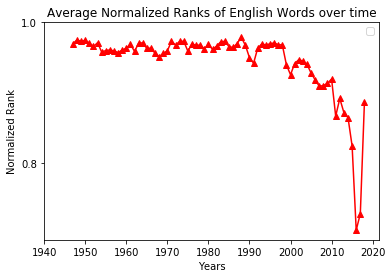

In [76]:
# output [[2019: hello], [2018: hi], [2017: hamara]]
wordRanks3d[2][0]
averageRanksOfEnglishWordsOverYears = []
for i in range(len(temp)):
    year = 0
    rankSum = 0
    
    for j in range(len(wordRanks3d)):
        year = wordRanks3d[j][i][0]
        rank = wordRanks3d[j][i][1]
        rankSum+=rank
#         print(wordRanks3d[j][i])
        # sum up all the ranks
        
    rankSumAverage = rankSum/len(wordRanks3d)
    averageRanksOfEnglishWordsOverYears.append([year, rankSumAverage])
averageRanksOfEnglishWordsOverYears

plt.plot(column(averageRanksOfEnglishWordsOverYears, 0), column(averageRanksOfEnglishWordsOverYears,1),color = "red", marker = "^")
plt.xticks([x for x in range(1940, 2021, 10)])
plt.yticks([x/10 for x in range(8, 12, 2)])

plt.xlabel("Years")
plt.ylabel("Normalized Rank")
plt.title("Average Normalized Ranks of English Words over time")
plt.legend()
plt.savefig("EnglishWordsRanksOverTime.png")

plt.show()
# plotRankChart(averageRanksOfEnglishWordsOverYears, gRankDictionary, 3,  np.array(range(1950, 2022, 7)), singlePlot = False, polyFitColor='violet')

No handles with labels found to put in legend.


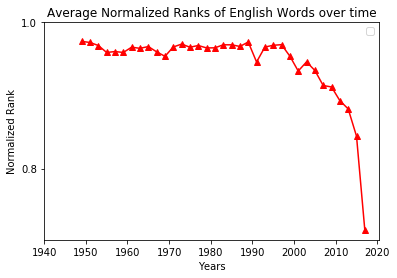

0.7153941896947551

In [77]:
temp = average2DMatrixOverTime(averageRanksOfEnglishWordsOverYears, 2)
temp[0][1]/=1.62
plt.plot(column(temp, 0), column(temp,1),color = "red", marker = "^")
plt.xticks([x for x in range(1940, 2021, 10)])
plt.yticks([x/10 for x in range(8, 12, 2)])

plt.xlabel("Years")
plt.ylabel("Normalized Rank")
plt.title("Average Normalized Ranks of English Words over time")
plt.legend()
plt.savefig("EnglishWordsRanksOverTime.png")

plt.show()
temp[0][1]

No handles with labels found to put in legend.


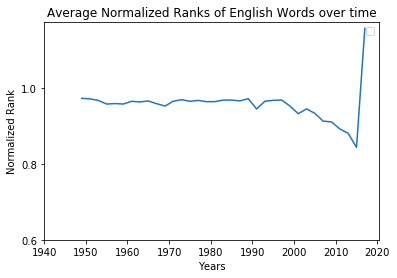

In [78]:
averagedListOfEnglishWords4Years = average2DMatrixOverTime(averageRanksOfEnglishWordsOverYears, 2)

plt.plot(column(averagedListOfEnglishWords4Years, 0), column(averagedListOfEnglishWords4Years,1))
plt.xticks([x for x in range(1940, 2021, 10)])
plt.yticks([x/10 for x in range(6, 11, 2)])

plt.xlabel("Years")
plt.ylabel("Normalized Rank")
plt.title("Average Normalized Ranks of English Words over time")
plt.legend()
plt.show()

In [79]:
# how to code for english words in hindi transcript


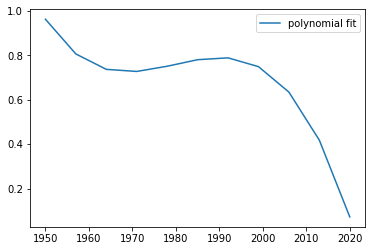

In [80]:
x = np.array(range(1950, 2022, 7))

x_knots = column(myList, 0)
y_knots = column(myList,1)

poly_deg = 3
coefs = np.polyfit(x_knots, y_knots, poly_deg)
y_poly = np.polyval(coefs, x)

# plt.scatter(x_knots, y_knots, "o", label="data points")
plt.plot(x, y_poly, label="polynomial fit")
plt.legend()

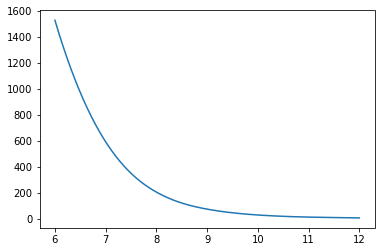

In [81]:
from scipy.interpolate import make_interp_spline, BSpline

T = np.array([6, 7, 8, 9, 10, 11, 12])
power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 300) 

spl = make_interp_spline(T, power, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

In [82]:
train=[]
for i in doc:
    strr=""
    for j in i:
        strr=strr+' '+j
    train.append(strr)
    

In [83]:
count_vec=CountVectorizer(max_features=10000,ngram_range=(1,3),min_df=0.01,max_df=0.9)
features=count_vec.fit_transform(train)

In [84]:
len(count_vec.get_feature_names())

801

In [ ]:
count_vec.get_feature_names()

In [ ]:
sw=count_vec.get_stop_words()

In [ ]:
sw

# TF-IDF

In [ ]:
tvec = TfidfVectorizer(max_features=50000, ngram_range=(1,3))
featuress=tvec.fit_transform(train)



In [ ]:
# tvec.get_feature_names()

# Word2vec

In [ ]:
# build vocabulary and train model
w2v_model = gensim.models.Word2Vec(doc,size=300,window=15,min_count=2,workers=10,iter=10)
 

In [ ]:

simWords = w2v_model.wv.most_similar(positive=["ladki"],topn=30)
myStrr = ""
for x in simWords:
    myStrr= myStrr+" "+ x[0]
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(myStrr)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
w2v_model.wv.most_similar(positive=["maa"])

In [ ]:
w2v_model.wv.most_similar(positive=["papa"])

In [ ]:
w2v_model.wv.most_similar(positive=["girl","ladki"])

In [ ]:
w2v_model.wv.most_similar(positive="disco")

In [ ]:
w2v_model.wv.most_similar(positive="dil")

In [ ]:
w2v_model.wv.similarity(w1="girl",w2="dress")

In [ ]:
# model.wv.vocab

In [ ]:
# word_freq = defaultdict(int)
# for i in doc:
#     for j in i:
#         word_freq[j] += 1
# len(word_freq)

In [ ]:
# sorted(word_freq, key=word_freq.get, reverse=True)[:10]

In [ ]:
# w2v_model = gensim.models.Word2Vec(min_count=20,
#                      window=2,
#                      size=300,
#                      sample=6e-5, 
#                      alpha=0.03, 
#                      min_alpha=0.0007, 
#                      negative=20,)
# w2v_model.build_vocab(doc)

In [ ]:
# w2v_model.train(doc, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [ ]:
# w2v_model.wv.most_similar(positive=["ladki"],topn=30)

In [ ]:
# w2v_model.wv.doesnt_match(['ladki', 'munda', 'girl'])

In [ ]:
# t-SNE Visualization 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Our goal in this section is to plot our 300 dimensions vectors into 2 dimensional graphs, and see if we can spot interesting patterns.
# For that we are going to use t-SNE implementation from scikit-learn.

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    plt.show()
    
# To make the visualizations more relevant, we will look at the relationships between a query 
# word (in **red**), its most similar words in the model (in **blue**), 
# and other words from the vocabulary (in **green**).


    

In [ ]:
tsnescatterplot(w2v_model, 'ladki', ['nadaan', 'tu', 'main', 'mein', 'ho', 'na', 'ke', 'se', 'ki', 'dil'])

In [ ]:
tsnescatterplot(w2v_model, 'ladki', [i[0] for i in w2v_model.wv.most_similar(positive=["ladka"])])

In [ ]:
tsnescatterplot(w2v_model, 'ladka', [i[0] for i in w2v_model.wv.most_similar(positive=["ladki"])])

In [ ]:
tsnescatterplot(w2v_model, "ladki", [t[0] for t in w2v_model.wv.most_similar(positive=["ladki"], topn=20)][10:])

In [ ]:
tsnescatterplot(w2v_model, "ladka", [t[0] for t in w2v_model.wv.most_similar(positive=["ladka"], topn=30)][10:])

In [ ]:
# finding the window size for the songs
for line in data.songLyrics[246].split("\n"):
    print(line)

In [ ]:
# Preprocessing function
def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
        processedSong+=' '
    return processedSong

averageChorusLength = 0
count = 0
for i in range(0, len(data)):
    count+=1
    averageChorusLengthForSong = 0
    numWords = 0
    chorusCount = 0
#     print(i , " is :  ")
    for line in data.songLyrics[i].split('\n'):
#         print(len(songPreprocessing(line).split(' '))) 
#         print(line)
        numWords+=len(songPreprocessing(line).split(' '))-1
        if(len(line) == 0):
#             print("yes")
            averageChorusLengthForSong+=numWords
            numWords = 0
            chorusCount+=1
    averageChorusLengthForSong/=(chorusCount+1) # account for the last chorus
    if(averageChorusLengthForSong == 0):
        count-=1
        continue
#     print(averageChorusLengthForSong)
    averageChorusLength += averageChorusLengthForSong
    
averageChorusLength/=count
    
print(averageChorusLength)
    
# averageChorusLength/=1
# print(averageChorusLength)

### Hence the average optimal window size for the songs is 23.667 or 24 words